In [12]:
import pandas as pd
import numpy as np
import os
import librosa
import librosa.display
import IPython.display as ipd

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [13]:
# #PATH

path_info = "F:/178/Tugas Akhir/dataset/annotations/"
path_to_fitur = "F:/178/Tugas Akhir/dataset/coba fitur/"
path_to_file = "F:/178/Tugas Akhir/dataset/clips_45sec_wav/"
path_to_experiment ="F:/178/Tugas Akhir/dataset/experiment/"

In [ ]:
# ipd.Audio(data=y, rate=sr) # load a NumPy array

In [38]:
# LOAD

# 1. Get the file path to the included audio example
# filename = librosa.util.example_audio_file()
path = path_to_file+"/2.wav"

D = np.abs(librosa.stft(y))
times = librosa.frames_to_time(np.arange(D.shape[1]))

# 2. Load the audio as a waveform `y`
#    Store the sampling rate as `sr`
y, sr = librosa.load(path,sr=22050,mono=False) #load 45 and with same freq
sr

22050

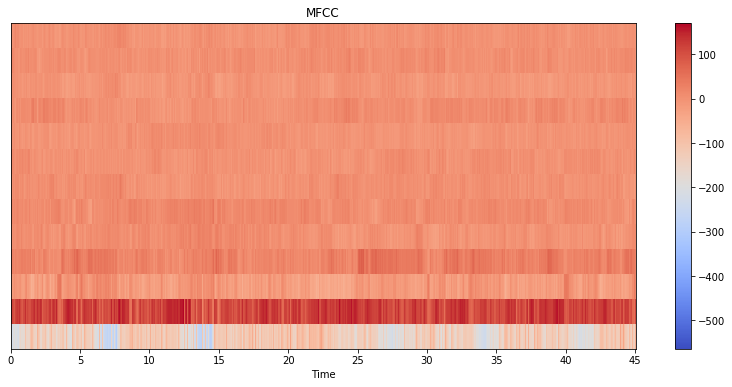

In [29]:
mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13) #13 is default dimension frame 512
# mfcc
plt.figure(figsize=(14, 6))
librosa.display.specshow(mfcc, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.show()

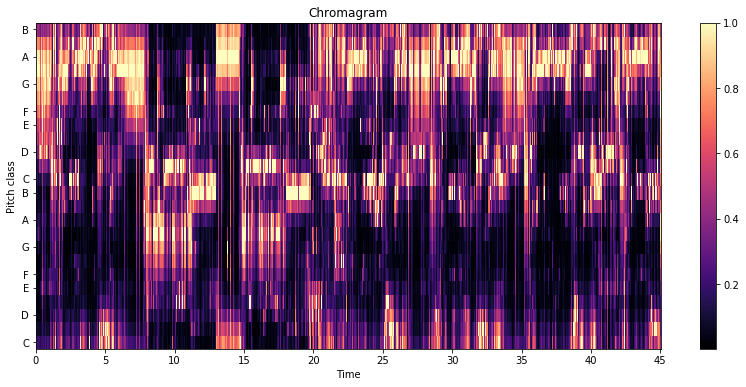

In [28]:
chroma = librosa.feature.chroma_stft(y=y, sr=sr, n_chroma=24)

plt.figure(figsize=(14, 6))
librosa.display.specshow(chroma, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title('Chromagram')
plt.show()

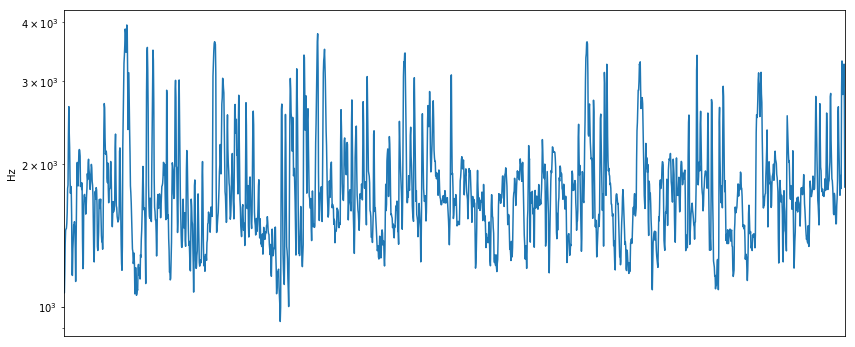

In [33]:
cent = librosa.feature.spectral_centroid(y=y, sr=sr)

plt.figure(figsize=(14, 6))
plt.semilogy(cent.T, label='Spectral centroid')
plt.ylabel('Hz')
plt.xticks([])
plt.xlim([0, cent.shape[-1]])
plt.show()

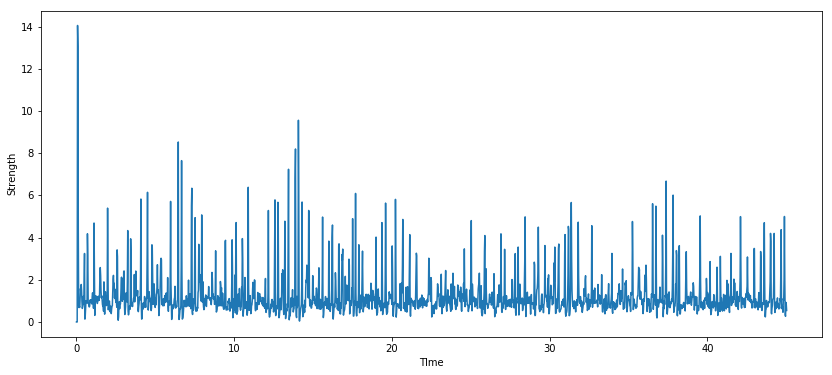

In [37]:
onset_env = librosa.onset.onset_strength(y=y, sr=sr) #1 is default dimension 512 frame

plt.figure(figsize=(14, 6))

plt.ylabel('Strength')
plt.xlabel('TIme')
plt.plot(times, onset_env, label='Mean (mel)')
plt.show()

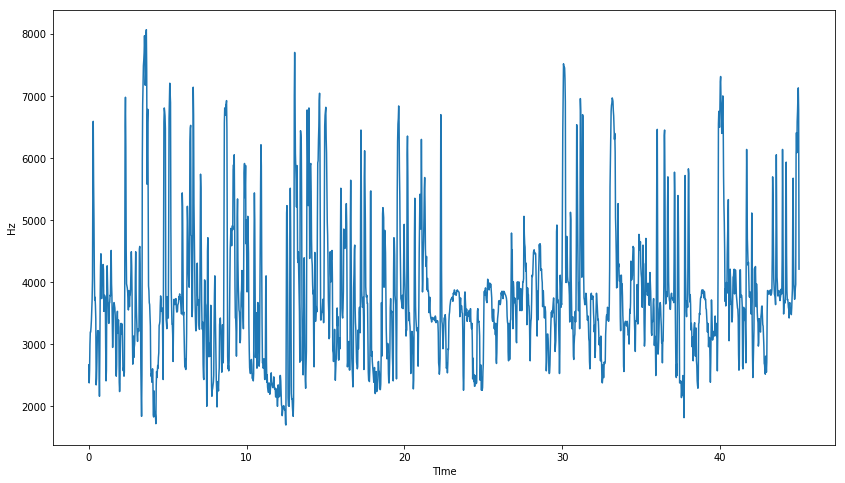

In [39]:
rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr) #1 is default dimension 512 frame

plt.figure(figsize=(14, 8))

plt.ylabel('Hz')
plt.xlabel('TIme')
plt.plot(times, rolloff.T,label='Roll-off frequency')
plt.show()

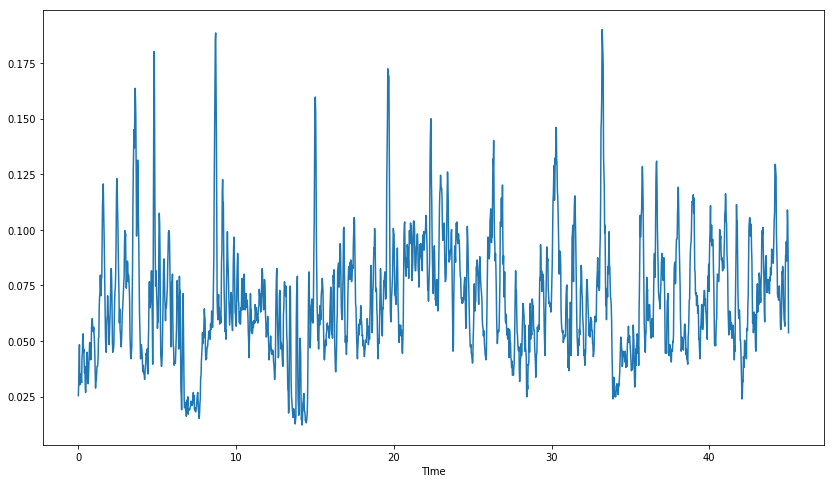

In [42]:
zc = librosa.feature.zero_crossing_rate(y)

plt.figure(figsize=(14, 8))

# plt.ylabel('Hz')
plt.xlabel('TIme')
plt.plot(times, zc.T)
plt.show()

In [ ]:
# SCF and SFM

# y, sr = librosa.load(librosa.util.example_audio_file())
flatness = librosa.feature.spectral_flatness(y=y)
print("Bentuk matrix :",flatness.shape)
print("Nilai Max matrix :",flatness.max())
print("Nilai Min matrix :",flatness.min())
# zc_to_csv = pandas.DataFrame(zc)
# zc_to_csv.to_csv("zc.csv")